# Netflix Visualizations (Descriptive Statistics) 🎬

<font size="3">Netflix is one of the top OTT platforms in this time. This notebook contains analytics of Netflix Shows and Analytics based on contents. I have used Seaborn for visual charts</font>

1. Import Libraries & Data
2. Missing data analysis
3. Exploratory Data Analysis<br>
	3.1 Year wise number of released movies/shows<br>
	3.2 Explore Movies vs TV Shows<br>
	3.3 Content distribution based on rating<br>
	3.4 Top 5 country wise ratings<br>
	3.5 Top 10 Movies and TV Shows<br>
	3.6 Duration analysis<br>
    
**Data Structure**<br>
show_id - object<br>
type - object<br>
title - object<br>
director - object<br>
cast - object<br>
country - object<br>
date_added - object<br>
release_year - int64<br>
rating - object<br>
duration - object<br>
listed_in - object<br>
description - object


<font size="5">1. Import Libraries & Data</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data from CSV file
netflix = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")

In [3]:
# Let see the dataset structure
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<font size="5">2. Missing data analysis</font>

In [4]:
# Display numeric value information and datatype

netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Get percentage of null values

netflix.isnull().sum()/(len(netflix))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

As per obversation there 29% directors are missing or null. Country and cast also have 9% null values

In [7]:
# Remove director column as it has maximum null values

netflix.drop('director', axis=1, inplace=True)

In [8]:
# Drop `date_added` as we don't need it in analytics
netflix = netflix[netflix['date_added'].notna()]

In [9]:
# Display value counts of ratings

netflix.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [10]:
# Fill null values of rating with most occuring rating
netflix.rating.fillna('TV-MA', inplace=True)

<font size="5">3. Exploratory Data Analysis</font>

In this part i displayed various type of data visulizations using seaborn. You can use other visulization libraries too

<font size="3">**3.1 Year wise number of released movies/shows**</font>

Text(0.5, 1.0, 'Year Wise Releases')

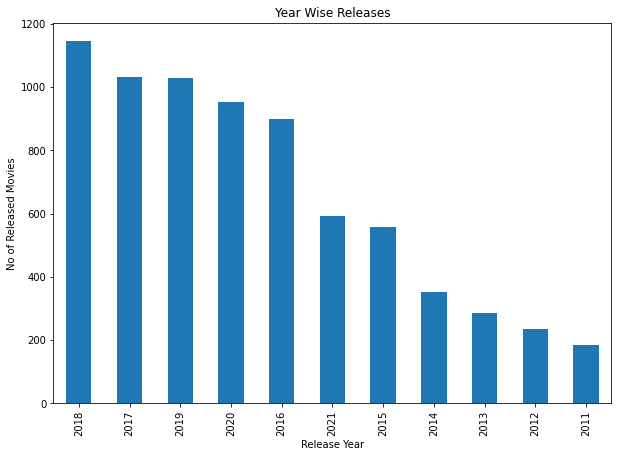

In [11]:
# Year wise number of released movies/shows
plt.figure(figsize=(13,10))
g = netflix[netflix['release_year'] > 2010].release_year.value_counts().plot.bar(figsize=(10, 7))
g.set_xlabel("Release Year")
g.set_ylabel("No of Released Movies")
g.set_title("Year Wise Releases")

In [12]:
netflix.country.value_counts()

United States                                                           2812
India                                                                    972
United Kingdom                                                           418
Japan                                                                    244
South Korea                                                              199
                                                                        ... 
Canada, Nigeria                                                            1
United States, United Kingdom, Denmark, Sweden                             1
Ireland, United States, France                                             1
United States, Philippines                                                 1
Australia, United Kingdom, United States, New Zealand, Italy, France       1
Name: country, Length: 748, dtype: int64

<font size="3">**3.2 Explore Movies vs TV Shows**</font>

Text(0.5, 1.0, 'Movies vs TV Shows')

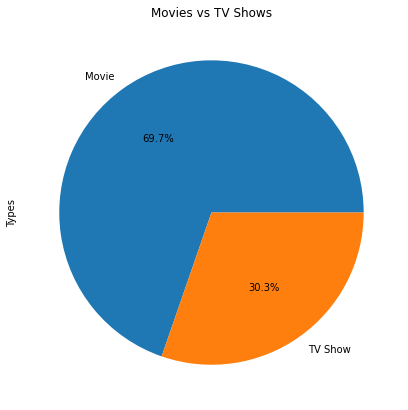

In [13]:
# Explore Movies vs TV Shows

g = netflix.type.value_counts().plot.pie(figsize=(10, 7),autopct= "%1.1f%%")
g.set_ylabel("Types")
g.set_title("Movies vs TV Shows")

Number of movies release is comparatively higher than the TV Shows

<font size="3">**3.3 Content distribution based on rating**</font>

Text(0.5, 1.0, 'Ratings Wise Counts')

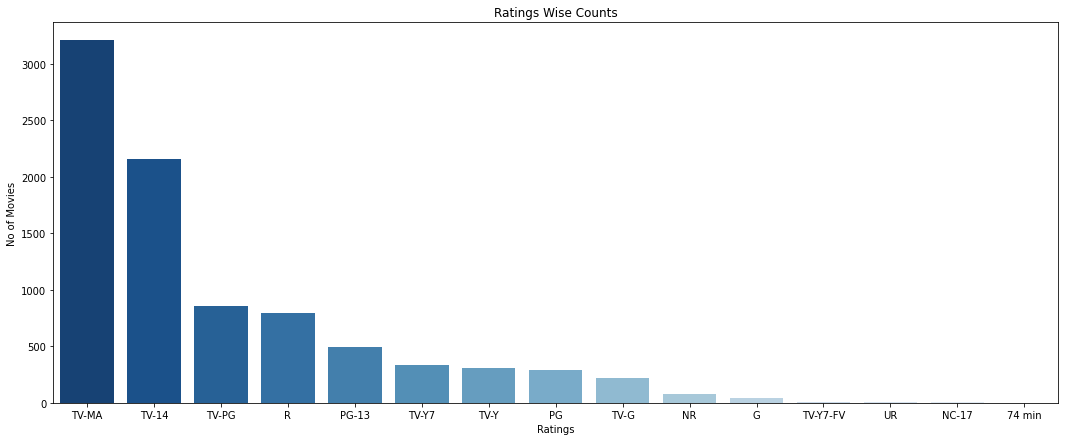

In [14]:
# Show content distribution based on rating

plt.figure(figsize=(18,7))
g = sns.countplot(x='rating', data=netflix, palette='Blues_r', order=netflix['rating'].value_counts().index[0:15])
g.set_xlabel("Ratings")
g.set_ylabel("No of Movies")
g.set_title("Ratings Wise Counts")

<font size="3">**3.4 Top 5 country wise ratings**</font>

Text(0.5, 1.0, 'Top 5 country wise ratings')

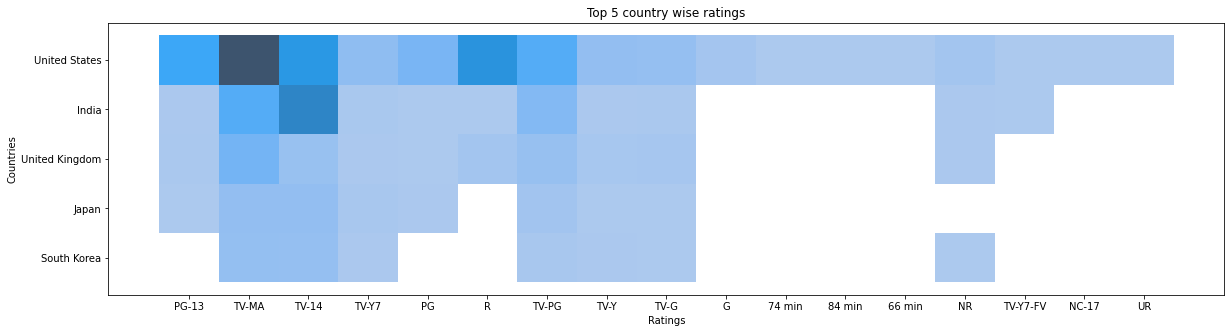

In [15]:
# Show content top 5 country wise ratings

plt.figure(figsize=(20,5))
top_countries = netflix[netflix['country'].isin(['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'])]
g = sns.histplot(x='rating', y='country', data=top_countries)
g.set_xlabel("Ratings")
g.set_ylabel("Countries")
g.set_title("Top 5 country wise ratings")

<font size="3">**3.5 Top 10 Movies and TV Shows**</font>

In [16]:
# Top 10 oldest movies

netflix[netflix['type'] == 'Movie'].sort_values('release_year')[0:10]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
7790,s7791,Movie,Prelude to War,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8205,s8206,Movie,The Battle of Midway,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...
8763,s8764,Movie,WWII: Report from the Aleutians,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8739,s8740,Movie,Why We Fight: The Battle of Russia,NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8419,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...
8640,s8641,Movie,Tunisian Victory,Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-14,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...
8436,s8437,Movie,The Negro Soldier,NaN,United States,"March 31, 2017",1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...
7575,s7576,Movie,Nazi Concentration Camps,NaN,United States,"March 31, 2017",1945,TV-MA,59 min,"Classic Movies, Documentaries",Shocking footage shows Nazi concentration camp...
7930,s7931,Movie,San Pietro,NaN,United States,"March 31, 2017",1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley..."


In [17]:
# Top 10 oldest TV Show

netflix[netflix['type'] == 'TV Show'].sort_values('release_year')[0:10]

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,NaN,United States,"February 9, 2021",1945,TV-MA,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,NaN,United States,"February 1, 2017",1946,TV-14,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),Rod Serling,United States,"July 1, 2017",1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...
4550,s4551,TV Show,Monty Python's Fliegender Zirkus,"Graham Chapman, John Cleese, Eric Idle, Terry ...","United Kingdom, West Germany","October 2, 2018",1972,TV-MA,1 Season,"International TV Shows, TV Comedies",The Pythons elevate the absurd to new heights ...
4551,s4552,TV Show,Monty Python's Flying Circus,"John Cleese, Graham Chapman, Terry Jones, Eric...",United Kingdom,"October 2, 2018",1974,TV-14,4 Seasons,"British TV Shows, Classic & Cult TV, Internati...",The Monty Python players make their mark with ...
6549,s6550,TV Show,Dad's Army,"Arthur Lowe, John Le Mesurier, Clive Dunn, Joh...",United Kingdom,"March 31, 2018",1977,TV-PG,10 Seasons,"British TV Shows, Classic & Cult TV, TV Comedies",This beloved sitcom follows the unlikely heroe...
6674,s6675,TV Show,El Chavo,"Roberto Gómez Bolaños, María Antonieta de las ...",Mexico,"December 31, 2017",1979,TV-PG,1 Season,"Classic & Cult TV, Kids' TV, Spanish-Language ...","El Chavo is a poor, nameless orphan who lives ..."
7588,s7589,TV Show,Ninja Hattori,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...


<font size="3">**3.6 Month wise released Movies**</font>

In [18]:
# Extract month from date_added column
netflix['month'] = pd.to_datetime(netflix['date_added']).dt.month

Text(0.5, 1.0, 'Month wise releases')

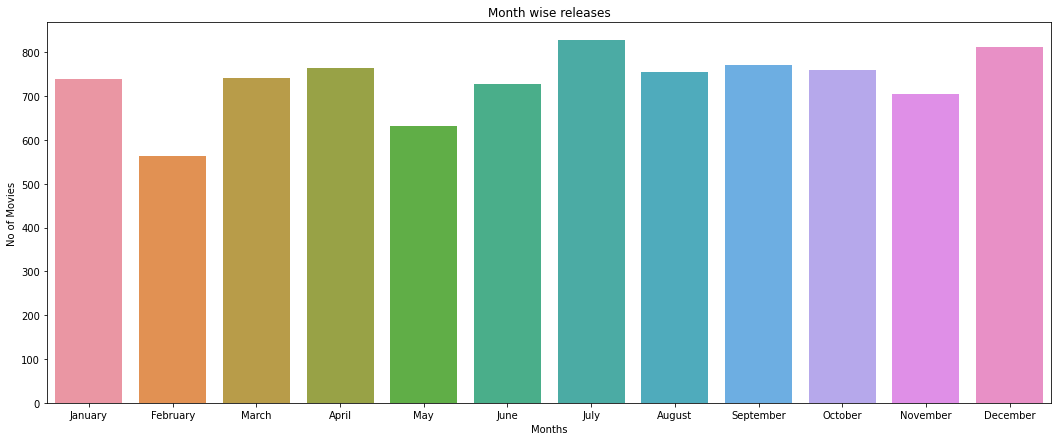

In [19]:
# Show content distribution based on rating

plt.figure(figsize=(18,7))

g = sns.countplot(x='month', data=netflix)
g.set_xticklabels(['January','February','March','April',
                   'May','June','July','August','September','October','November','December'])
g.set_xlabel("Months")
g.set_ylabel("No of Movies")
g.set_title("Month wise releases")

Comparing to other months, more Movies and TV Shows are released in July and December month

Please upvote if you liked the kernel! It motevates me :)